# Generating a latent representation of your own image
(Skip this part and go to next if fake image is to be used)

In [ ]:
%tensorflow_version 1.x
# !pip3 install tensorflow-gpu==1.14 --user
import tensorflow as tf

!git clone https://github.com/Puzer/stylegan
%cd stylegan

TensorFlow 1.x selected.
Cloning into 'stylegan'...
remote: Enumerating objects: 105, done.
remote: Total 105 (delta 0), reused 0 (delta 0), pack-reused 105
Receiving objects: 100% (105/105), 10.43 MiB | 5.59 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/stylegan
gcc: error: test_nvcc.cu: No such file or directory
gcc: warning: ‘-x c++’ after last input file has no effect
gcc: fatal error: no input files
compilation terminated.
Tensorflow version: 1.15.2
GPU 0: Tesla K80 (UUID: GPU-99c416fe-21d9-3fd7-2053-7b19f16262f0)
GPU Identified at: /device:GPU:0


In [ ]:
!mkdir raw_images aligned_images generated_images latent_representations

import requests, io
from PIL import Image
img_url = 'http://vicenteordonez.com/deeplearning/lab_members/vicente.png'
response = requests.get(img_url)
img_pil = Image.open(io.BytesIO(response.content))
img_pil = img_pil.save("profv.png") 
!mv profv.png raw_images/

!python align_images.py raw_images aligned_images

Using TensorFlow backend.
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Fu

In [ ]:
### Edit in encode_images.py to use local pretrained model path ###
import pickle
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!python encode_images.py aligned_images/ generated_images/ latent_representations/ --iterations 1000

/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type

# Using the generated latent representation to finetune image

In [ ]:
%tensorflow_version 1.x
# !pip3 install tensorflow-gpu==1.14 --user
import tensorflow as tf
!git clone https://github.com/Puzer/stylegan
%cd stylegan

print('Tensorflow version: {}'.format(tf.__version__) )
!nvidia-smi -L
print('GPU Identified at: {}'.format(tf.test.gpu_device_name()))

TensorFlow 1.x selected.
Cloning into 'stylegan'...
remote: Enumerating objects: 105, done.
remote: Total 105 (delta 0), reused 0 (delta 0), pack-reused 105
Receiving objects: 100% (105/105), 10.43 MiB | 6.09 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/stylegan
Tensorflow version: 1.15.2
GPU 0: Tesla K80 (UUID: GPU-063787a1-53a2-8663-f8bc-705a4d0463e6)
GPU Identified at: /device:GPU:0


In [ ]:
### replace import tensorflow.compat.v1 as tf ; tf.disable_v2_behavior() in dnnlib.tflib.tfutil ###

import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from encoder.generator_model import Generator

tflib.init_tf()
DATA_PATH = "/content/drive/My Drive/CV/"
infile = open(DATA_PATH+'karras2019stylegan-ffhq-1024x1024.pkl','rb')
generator_network, discriminator_network, Gs_network = pickle.load(infile)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
### Restart runtime here ###

!pip3 install tensorflow-gpu==1.14 --user
import tensorflow as tf

import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config

import matplotlib.pyplot as plt
%matplotlib inline
%cd stylegan
from encoder.generator_model import Generator

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
tflib.init_tf()
DATA_PATH = "/content/drive/My Drive/CV/"
infile = open(DATA_PATH+'karras2019stylegan-ffhq-1024x1024.pkl','rb')
generator_network, discriminator_network, Gs_network = pickle.load(infile)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

In [ ]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [ ]:
# Loading already learned representations
me = np.load(DATA_PATH+'profv_01.npy')

# Loading latent directions
smile_direction = np.load(DATA_PATH+'smile.npy')
gender_direction = np.load(DATA_PATH+'gender.npy')
age_direction = np.load(DATA_PATH+'age.npy')

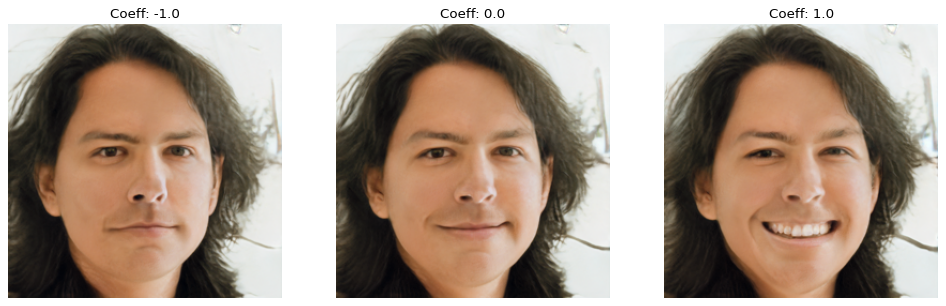

In [ ]:
move_and_show(me, smile_direction, [-1, 0, 1])

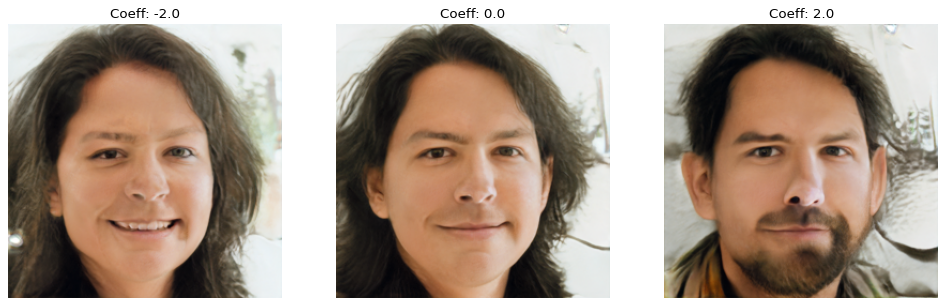

In [ ]:
move_and_show(me, gender_direction, [-2, 0, 2])

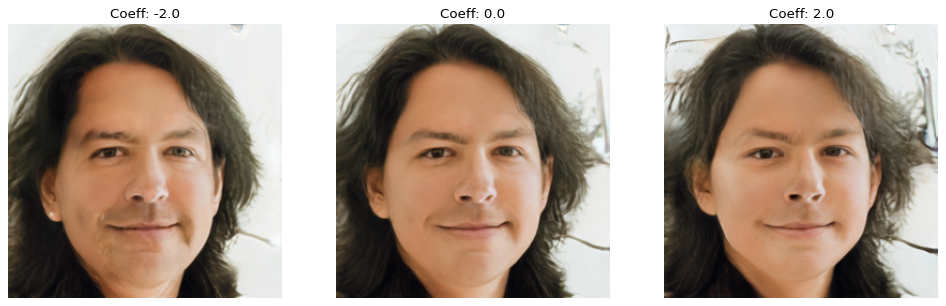

In [ ]:
move_and_show(me, age_direction, [-2, 0, 2])

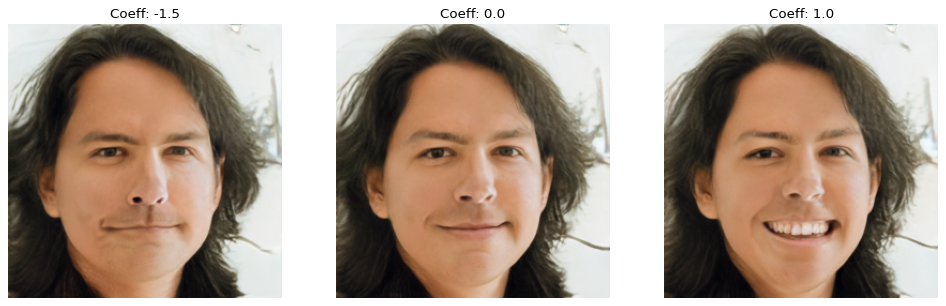

In [ ]:
sml2_direction = np.load(DATA_PATH+'stylegan_ffhq_smile_w_boundary.npy')
move_and_show(me, sml2_direction, [-1.5, 0, 1])

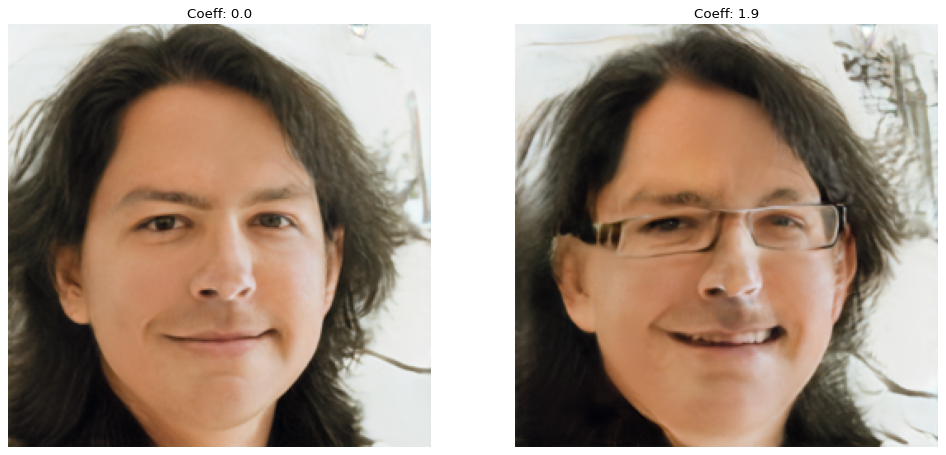

In [ ]:
glasses_direction = np.load(DATA_PATH+'stylegan_ffhq_eyeglasses_w_boundary.npy')
move_and_show(me, glasses_direction, [0, 1.85])